# Applying the gluing method to R(K4,K6-e)
This file implements the same methods as the other file but without using sage math. Instead it uses network x.

## First, methods for enumerating (r, s, t)-cliques and (r, s, t)-independent sets. 

Recall for (r, s, t)-cliques, (r, s, t) can be (0, 2, 2). Note we don't have to change anything here.

In [12]:
import itertools
import networkx as nx

#Couldn't find this in the documentation so making it here
def is_clique(G, nodes):
    all_edges = True
    for pair in itertools.combinations(nodes, 2):
        if not G.has_edge(pair[0], pair[1]):
            all_edges = False
            break
    
    return all_edges


# Description: Defintion on page 6
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,5,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all the (r, s, t) cliques. 


def get_rst_cliques(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_cliques = []
    VK = K.nodes()
    xs = (set(G.nodes()) - set(VK))
    xs.remove(a)
    ys = (set(H.nodes()) - set(VK))
    ys.remove(b)

    def clique_helper(r, s, t, VK_, xs_, ys_):
        output = []
        if r > 0:
            for w_comb in itertools.combinations(VK_,r):
                #contains s-tuples that form r+s - independent sets with w in G
                x_cliques = []
                #contains t-tuples that form r+t - independent sets with w in H
                y_cliques = []

                for x_comb in itertools.combinations(xs_, s):
                    comb = w_comb + x_comb
                    if is_clique(G, comb):
                        x_cliques.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    comb = w_comb + y_comb
                    if is_clique(H, comb):
                        y_cliques.append(y_comb)

                for x_comb in x_cliques:
                    for y_comb in y_cliques:
                        output.append( ( w_comb, x_comb, y_comb ) )
            return output
        else:
            #contains s-tuples that form s - independent sets in G
            x_cliques = []
            #contains t-tuples that form t - independent sets in H
            y_cliques = []
            for x_comb in itertools.combinations(xs_, s):
                if is_clique(G, x_comb):
                    x_cliques.append(x_comb)

            for y_comb in itertools.combinations(ys_, t):
                if is_clique(H, y_comb):
                    y_cliques.append(y_comb)

            for x_comb in x_cliques:
                for y_comb in y_cliques:
                    output.append( ( (), x_comb, y_comb ) )
            
            return output


    rst_cliques += clique_helper(0,2,2,VK,xs,ys)

    return rst_cliques

Recall for (r, s, t)-independent sets, we have (r, s, t) is either (4, 1, 1), (3, 1, 2), (3, 2, 1), (2, 3, 1), (2, 1, 3), (2, 2, 2), (1, 2, 3), (1, 3, 2), (1, 4, 1), (1, 1, 4), (0, 3, 3), (0, 2, 4), (0, 4, 2). Note that 6-independent sets are forbidden, but just adding 1 edge between this doesn't fully work in this case. Adding 1 edge to a 6 independent set still produces a J6 in the complement. Thus, for (r,s,t)-independent sets, we now need at least 2 edges present.

In [10]:
#Also putting this here
def is_independent_set(G, nodes):
    no_edges = True
    for pair in itertools.combinations(nodes, 2):
        if G.has_edge(pair[0], pair[1]):
            no_edges = False
            break
    
    return no_edges



# Description: Defintion on page 6
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,J6,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all the (r, s, t) independent sets. 
def get_rst_independent_sets(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_IS = []
    VK = K.nodes()
    xs = (set(G.nodes()) - set(VK))
    xs.remove(a)
    ys = (set(H.nodes()) - set(VK))
    ys.remove(b)

    def indepHelper(r,s,t, VK_, xs_, ys_):
        output = []
        if r > 0:
            for w_comb in itertools.combinations(VK_,r):
                #contains s-tuples that form r+s - independent sets with w in G
                x_cliques = []
                #contains t-tuples that form r+t - independent sets with w in H
                y_cliques = []

                for x_comb in itertools.combinations(xs_, s):
                    comb = w_comb + x_comb
                    if is_independent_set(G, comb):
                        x_cliques.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    comb = w_comb + y_comb
                    if is_independent_set(H, comb):
                        y_cliques.append(y_comb)

                for x_comb in x_cliques:
                    for y_comb in y_cliques:
                        output.append( ( w_comb, x_comb, y_comb ) )
            return output
        else:
            #contains s-tuples that form s - independent sets in G
            x_cliques = []
            #contains t-tuples that form t - independent sets in H
            y_cliques = []
            for x_comb in itertools.combinations(xs_, s):
                if is_independent_set(G, x_comb):
                    x_cliques.append(x_comb)

            for y_comb in itertools.combinations(ys_, t):
                if is_independent_set(H, y_comb):
                    y_cliques.append(y_comb)

            for x_comb in x_cliques:
                for y_comb in y_cliques:
                    output.append( ( (), x_comb, y_comb ) )
            
            return output

    rst_IS += indepHelper(4, 1, 1, VK, xs, ys)
    rst_IS += indepHelper(3, 1, 2, VK, xs, ys)
    rst_IS += indepHelper(3, 2, 1, VK, xs, ys)
    rst_IS += indepHelper(2, 3, 1, VK, xs, ys)
    rst_IS += indepHelper(2, 1, 3, VK, xs, ys)
    rst_IS += indepHelper(2, 2, 2, VK, xs, ys)
    rst_IS += indepHelper(1, 2, 3, VK, xs, ys)
    rst_IS += indepHelper(1, 3, 2, VK, xs, ys)
    rst_IS += indepHelper(1, 4, 1, VK, xs, ys)
    rst_IS += indepHelper(1, 1, 4, VK, xs, ys)
    rst_IS += indepHelper(0, 3, 3, VK, xs, ys)
    rst_IS += indepHelper(0, 2, 4, VK, xs, ys)
    rst_IS += indepHelper(0, 4, 2, VK, xs, ys)
    
    return rst_IS

Note we also have a third kind of structure to look for - We look for (r,s,t) pairs where between the 6 vertices there is exactly 1 edge. Since there is initially no edges between vertices in G and H, we look for pairs where there is exactly 1 edge between vertices in G, between vertices in H, and between G/H and K. For these cases, we just need to add one edge between G or H to prevent J6 from forming.

In [3]:
# Description: Indep-set but now we can have 1 edge between vertices in G/H.
# Input: G, a (first pointed graph we are gluing) and H, b (second pointed graph we are glueing)
# K is the shared neighborhood of a and b in both graphs (K is in R(3,J6,d)). Note that for this method, we assume
# K's vertices when found in G and H will have the same labels in all 3 graphs.
# Output: A list of all sort of (r, s, t) independent sets with one edge. 
def get_rst_indep_sets_one_edge(G, a, H, b, K):
    #Contains 3-tuples of the form (w_tuple, x_tuple, y_tuple)
    rst_IS = []
    VK = K.nodes()
    xs = (set(G.nodes()) - set(VK))
    xs.remove(a)
    ys = (set(H.nodes()) - set(VK))
    ys.remove(b)

    def indepOneEdgeHelper(r,s,t, VK_, xs_, ys_):
        output = []
        if r > 0:
            for w_comb in itertools.combinations(VK_,r):
                #contains s-tuples that form r+s - independent sets with w in G
                x_edge_set = []
                x_no_edge_set = []
                #contains t-tuples that form r+t - independent sets with w in H
                y_edge_set = []
                y_no_edge_set = []
                
                for x_comb in itertools.combinations(xs_, s):
                    comb = w_comb + x_comb
                    num_edges = 0
                    for pairs in itertools.combinations(comb, 2):
                        if G.has_edge(pairs[0], pairs[1]):
                            num_edges += 1
                    if num_edges == 1:
                        x_edge_set.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    comb = w_comb + y_comb
                    if is_independent_set(H, comb):
                        y_no_edge_set.append(y_comb)
                
                for x_comb in itertools.combinations(xs_, s):
                    comb = w_comb + x_comb
                    if is_independent_set(G, comb):
                        x_no_edge_set.append(x_comb)

                for y_comb in itertools.combinations(ys_, t):
                    comb = w_comb + y_comb
                    num_edges = 0
                    for pairs in itertools.combinations(comb, 2):
                        if H.has_edge(pairs[0], pairs[1]):
                            num_edges += 1
                    if num_edges == 1:
                        y_edge_set.append(y_comb)

                for x_comb in x_edge_set:
                    for y_comb in y_no_edge_set:
                        output.append( ( w_comb, x_comb, y_comb ) )
                for x_comb in x_no_edge_set:
                    for y_comb in y_edge_set:
                        output.append( ( w_comb, x_comb, y_comb ) )
            return output
        else:
            #contains s-tuples that form r+s - independent sets with w in G
            x_edge_set = []
            x_no_edge_set = []
            #contains t-tuples that form r+t - independent sets with w in H
            y_edge_set = []
            y_no_edge_set = []

            for x_comb in itertools.combinations(xs_, s):
                num_edges = 0
                for pairs in itertools.combinations(x_comb, 2):
                    if G.has_edge(pairs[0], pairs[1]):
                        num_edges += 1
                if num_edges == 1:
                    x_edge_set.append(x_comb)

            for y_comb in itertools.combinations(ys_, t):
                if is_independent_set(H, y_comb):
                    y_no_edge_set.append(y_comb)

            for x_comb in itertools.combinations(xs_, s):
                if is_independent_set(G, x_comb):
                    x_no_edge_set.append(x_comb)

            for y_comb in itertools.combinations(ys_, t):
                num_edges = 0
                for pairs in itertools.combinations(y_comb, 2):
                    if H.has_edge(pairs[0], pairs[1]):
                        num_edges += 1
                if num_edges == 1:
                    y_edge_set.append(y_comb)

            for x_comb in x_edge_set:
                for y_comb in y_no_edge_set:
                    output.append( ( (), x_comb, y_comb ) )
            for x_comb in x_no_edge_set:
                for y_comb in y_edge_set:
                    output.append( ( (), x_comb, y_comb ) )
            
            return output

    rst_IS += indepOneEdgeHelper(4, 1, 1, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(3, 1, 2, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(3, 2, 1, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(2, 3, 1, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(2, 1, 3, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(2, 2, 2, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(1, 2, 3, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(1, 3, 2, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(1, 4, 1, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(1, 1, 4, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(0, 3, 3, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(0, 2, 4, VK, xs, ys)
    rst_IS += indepOneEdgeHelper(0, 4, 2, VK, xs, ys)
    
    return rst_IS

Here is some testing to compare with the sage method

In [5]:
G = nx.read_graph6('dataset_k3kme/k3k6e_16.g6')
G = nx.complement(G)
map1 = {0:"a", 11:"k0", 12:"k1", 13:"k2", 14:"k3", 15:"k4"}
for i in range(16):
    if i not in map1:
        map1[i] = "g"+str(i)
nx.relabel_nodes(G, map1, False)
#nx.draw(G, with_labels=True)

H = nx.read_graph6('dataset_k3kme/k3k6e_16.g6')
H = nx.complement(H)
map2 = {0:"b", 11:"k0", 12:"k1", 13:"k2", 14:"k3", 15:"k4"}
for i in range(16):
    if i not in map2:
        map2[i] = "h"+str(i)
nx.relabel_nodes(H, map2, False)
#nx.draw(H, with_labels=True)

K = nx.Graph()
K.add_nodes_from(["k0", "k1", "k2", "k3", "k4"])

#out = get_rst_cliques(G, "a", H, "b", K)
#out = get_rst_independent_sets(G, "a", H, "b", K)
out = get_rst_indep_sets_one_edge(G, "a", H, "b", K)
print(len(out))
for i in out:
    print(i)

13710
(('k0', 'k1', 'k2'), ('g1',), ('h2', 'h1'))
(('k0', 'k1', 'k2'), ('g1',), ('h7', 'h1'))
(('k0', 'k1', 'k2'), ('g1',), ('h3', 'h1'))
(('k0', 'k1', 'k2'), ('g1',), ('h5', 'h1'))
(('k0', 'k1', 'k2'), ('g1',), ('h4', 'h1'))
(('k0', 'k1', 'k2'), ('g1',), ('h6', 'h1'))
(('k0', 'k1', 'k3'), ('g2',), ('h2', 'h9'))
(('k0', 'k1', 'k3'), ('g2',), ('h2', 'h8'))
(('k0', 'k1', 'k3'), ('g2',), ('h2', 'h3'))
(('k0', 'k1', 'k3'), ('g2',), ('h2', 'h5'))
(('k0', 'k1', 'k3'), ('g2',), ('h2', 'h4'))
(('k0', 'k1', 'k3'), ('g2',), ('h2', 'h1'))
(('k0', 'k1', 'k4'), ('g3',), ('h2', 'h3'))
(('k0', 'k1', 'k4'), ('g3',), ('h7', 'h3'))
(('k0', 'k1', 'k4'), ('g3',), ('h9', 'h3'))
(('k0', 'k1', 'k4'), ('g3',), ('h8', 'h3'))
(('k0', 'k1', 'k4'), ('g3',), ('h3', 'h6'))
(('k0', 'k1', 'k4'), ('g3',), ('h3', 'h1'))
(('k0', 'k2', 'k3'), ('g4',), ('h10', 'h4'))
(('k0', 'k2', 'k3'), ('g4',), ('h2', 'h4'))
(('k0', 'k2', 'k3'), ('g4',), ('h8', 'h4'))
(('k0', 'k2', 'k3'), ('g4',), ('h5', 'h4'))
(('k0', 'k2', 'k3'), ('g4

# Second, a method that turns constraints on M into a SAT instance.  

A very popular question in computer science is the *SATisfiability problem* which asks: how do you determine if a boolean formula (on n boolean variables) has an assignment of the variables that makes the formula true. Our formulas tend to be of the following form 

(x_1 OR x_2 OR ... x_k) AND (y_1 OR y_2 OR ... y_k) AND ... AND (z_1 OR z_2 OR ... OR z_k)

It turns out SAT is an NP hard problem! But SAT solving is such a common instance in computer science, there's a whole host of results and algorithms on it. 

We have a bunch of 0, 1 variables in a matrix M which needs to satisfy certain constraints (dictated by the rst cliques and indpendent sets). This is an excerpt from the paper: 

` Each entry m_ij of M is a variable, with value FALSE, TRUE or UNKNOWN, while each set {x1, . . . , xs} × {y1, . . . , yt} is a clause. Clauses from potential (r, s, t)-cliques can’t have all their variables TRUE, while clauses from potential independent (r, s, t)-sets can’t have all their variables FALSE.`
 
In other words, each rst clique / independent set exactly corresponds to a clause in our SAT formula! So, finding all the possible matrices M amounts to finding all the satisfying assignments of a certain formula. 

In [6]:
# Description: Takes two pointed graphs and creates a SAT formula encoding the constraints a glueing defined by M must satisfy. 
# Input: Two pointed graphs (variables names according to notation in paper)
# Output: A list of clauses, along with maps from vertices of G and H to indices for the matrix M
import GluingClassesJ as gcj

def create_SAT_formula(G, a, H, b, K):
    
    # Find the rst-cliques and independent graphs
    rst_cliques = get_rst_cliques(G, a, H, b, K)
    rst_IS = get_rst_independent_sets(G, a, H, b, K)
    rst_ISOE =  get_rst_indep_sets_one_edge(G, a, H, b, K)
    
    VK = K.nodes()
    xs = (set(G.nodes()) - set(VK))
    xs.remove(a)
    g_map = {}
    i = 0
    for x in xs:
        g_map[x] = i
        i += 1

    ys = (set(H.nodes()) - set(VK))
    ys.remove(b)
    h_map = {}
    i = 0
    for y in ys:
        h_map[y] = i
        i += 1

    d_prime = len(xs) #i think this should be correct
    M = gcj.PotentialEdgeMatrix(d_prime, d_prime)
    clauses = []


    # For each (rst)-clique and independent set create a new Clause to represent it
    for clique in rst_cliques:
        g_vertices = clique[1]
        h_vertices = clique[2]
        variables = []
        for g_vertex in g_vertices:
            for h_vertex in h_vertices:
                variables.append(M.matrix[g_map[g_vertex]][h_map[h_vertex]])
        new_clause = gcj.Clause(variables, gcj.ClauseType.CLIQUE)
        clauses.append(new_clause)

    for indep_set in rst_IS:
        g_vertices = indep_set[1]
        h_vertices = indep_set[2]
        variables = []
        for g_vertex in g_vertices:
            for h_vertex in h_vertices:
                variables.append(M.matrix[g_map[g_vertex]][h_map[h_vertex]])
        new_clause = gcj.Clause(variables, gcj.ClauseType.INDEP_NO_EDGES)
        clauses.append(new_clause)

    for indep_set_OE in rst_ISOE:
        g_vertices = indep_set_OE[1]
        h_vertices = indep_set_OE[2]
        variables = []
        for g_vertex in g_vertices:
            for h_vertex in h_vertices:
                variables.append(M.matrix[g_map[g_vertex]][h_map[h_vertex]])
        new_clause = gcj.Clause(variables, gcj.ClauseType.INDEP_SAME_SET_EDGE)
        clauses.append(new_clause)
    
    return clauses, M, g_map, h_map

Once we have the SAT formula, we have to find all the satisfying assignments! Is there a Sage method which will just do this for us? Most likely (there are many SAT solvers out there). We implement the paper's stack based recursive solution. Here is the non-recursive part first

In [7]:
#Description: Takes a pre-setup stack and computes as much assignment as possible
#Input: stack is just a list used as a stack of variables. Note that because of how references work in python - modifying parts of stack
#effects the matrix and clauses outside of this function. 
#This probably means we need to make a copy of M/clauses/a new stack for each execution in case of failure.
#Output: Returns true/false if it works
def stack_algo(stack):
    assignments = []
    while len(stack) > 0:
        alpha = stack.pop()
        if alpha.exists == gcj.EdgeExists.FALSE:
            for i_clause in alpha.ind_set_clauses:
                num_variables = len(i_clause.potential_edges)
                #This means all are FALSE
                if i_clause.in_fail_state():
                    #print(str(i_clause) + " isn't satisfiable")
                    return False
                #this means all are FALSE except two variables
                #and either 1 is true and 1 is unknown or both are unknown
                elif i_clause.num_undesired == num_variables - 2 and i_clause.num_unknown >= 1:
                    for beta in i_clause.potential_edges:
                        if beta.exists == gcj.EdgeExists.UNKNOWN:
                            beta.set_exists(gcj.EdgeExists.TRUE)
                            #print(str(beta) + " is now true")
                            stack.append(beta)
            for i_clause in alpha.ind_same_set_clauses:
                num_variables = len(i_clause.potential_edges)
                #This means all are FALSE
                if i_clause.in_fail_state():
                    #print(str(i_clause) + " isn't satisfiable")
                    return False
                #this means all are FALSE except one variable
                elif i_clause.num_undesired == num_variables - 1 and i_clause.num_unknown == 1:
                    for beta in i_clause.potential_edges:
                        if beta.exists == gcj.EdgeExists.UNKNOWN:
                            beta.set_exists(gcj.EdgeExists.TRUE)
                            #print(str(beta) + " is now true")
                            stack.append(beta)
        else:
            for c_clause in alpha.clique_clauses:
                num_variables = len(c_clause.potential_edges)
                #this means all are TRUE
                if c_clause.in_fail_state():
                    #print(str(c_clause) + " isn't satisfiable")
                    return False
                #this means all are TRUE except one variable
                elif c_clause.num_undesired == num_variables - 1 and c_clause.num_unknown == 1:
                    for beta in c_clause.potential_edges:
                        if beta.exists == gcj.EdgeExists.UNKNOWN:
                            beta.set_exists(gcj.EdgeExists.FALSE)
                            #print(str(beta) + " is now false")
                            stack.append(beta)
    return True

In [8]:
# Sets up a stack to be used in the first call to stack_algo()
# INPUT: The set of clauses
# OUTPUT: A stack set up to be used in a first call to stack_algo()
# or None if no stack can be set up
def setup_stack(clauses):
    stack = []
    
    for clause in clauses:
        if len(clause.potential_edges) == 1:
            if clause.clause_type == gcj.ClauseType.CLIQUE:
                clause.potential_edges[0].set_exists(gcj.EdgeExists.FALSE)
                stack.append(clause.potential_edges[0])
            elif clause.clause_type == gcj.ClauseType.INDEP_SAME_SET_EDGE:
                clause.potential_edges[0].set_exists(gcj.EdgeExists.TRUE)
                stack.append(clause.potential_edges[0])
            else:
                #in this case, its a (4,1,1) indep set with no edges, but we need 2 edges.
                print("Problem", clause)
                return None
        elif len(clause.potential_edges) == 2:
            if clause.clause_type == gcj.ClauseType.INDEP_NO_EDGES:
                clause.potential_edges[0].set_exists(gcj.EdgeExists.TRUE)
                stack.append(clause.potential_edges[0])
                clause.potential_edges[1].set_exists(gcj.EdgeExists.TRUE)
                stack.append(clause.potential_edges[1])
                
    return stack

In [9]:
#Description: Takes the variables and clauses and recursively calls the stack algo to find all gluings
#Input: M are the initial variables, clauses are the clauses 
#This probably means we need to make a copy of M/clauses/a new stack for each execution in case of failure.
#Output: list of possible gluings
def recursive_solving(M, clauses, stack, depth):
    #print(depth)
    if stack_algo(stack) == False:
        #print("Failed at depth ", depth)
        #return 0
        return False
    else:
        unknown_list = []
        for list in M.matrix:
            for elem in list:
                if elem.exists == gcj.EdgeExists.UNKNOWN:
                    unknown_list.append(elem)
        if len(unknown_list) == 0:
            #return 1
            return True
        else:
            #this part of the code creates a copy of M and clauses
            #we use the original M and clauses for the first recursion, and the copy for a second
            #this copying is done to prevent changes in one recursion from affecting the second
            num_rows = len(M.matrix)
            num_cols = len(M.matrix[0])
            M_copy = gcj.PotentialEdgeMatrix(num_rows, num_cols)
            clauses_copy = []
            all_sat = True 
            for clause in clauses:
                #we only copy unsatisfied clauses as an optimization
                if not (clause.is_satisfied()):
                    all_sat = False
                    old_vars = clause.potential_edges
                    new_vars = []
                    for var in old_vars:
                        new_vars.append(M_copy.matrix[var.G_vertex][var.H_vertex])
                    new_clause = gcj.Clause(new_vars, clause.clause_type)
                    clauses_copy.append(new_clause)
                    
            num_unknown = 0
            for i in range(num_rows):
                for j in range(num_cols):
                    if M.matrix[i][j].exists == gcj.EdgeExists.TRUE:
                        M_copy.matrix[i][j].set_exists(gcj.EdgeExists.TRUE)
                    elif M.matrix[i][j].exists == gcj.EdgeExists.FALSE:
                        M_copy.matrix[i][j].set_exists(gcj.EdgeExists.FALSE)
                    else: 
                        num_unknown += 1

            if all_sat == True:
                #print("here", num_unknown, depth)
                return True
                #return int(2**num_unknown)
            
            #Using the paper's heuristic to decide what variable to add to the stack
            next_vertex = unknown_list[0]
            best_forcing = 0
            for unknown_candidate in unknown_list:
                num_forcing = 0
                for c_clause in unknown_candidate.clique_clauses:
                    num_variables = len(c_clause.potential_edges)
                    if c_clause.num_unknown == 2 and c_clause.num_undesired == num_variables - 2:
                        num_forcing += 1 
                for i_clause in unknown_candidate.ind_same_set_clauses:
                    num_variables = len(i_clause.potential_edges)
                    if i_clause.num_unknown == 2 and i_clause.num_undesired == num_variables - 2:
                        num_forcing += 1 
                for i_clause in unknown_candidate.ind_set_clauses:
                    num_variables = len(i_clause.potential_edges)
                    if i_clause.num_unknown == 3 and i_clause.num_undesired == num_variables - 3:
                        num_forcing += 1 
                if num_forcing > best_forcing:
                    next_vertex = unknown_candidate
                    best_forcing = num_forcing
            
            stack = [next_vertex]
            stack_copy = [M_copy.matrix[next_vertex.G_vertex][next_vertex.H_vertex]]
            
            M.matrix[next_vertex.G_vertex][next_vertex.H_vertex].set_exists(gcj.EdgeExists.FALSE)
            M_copy.matrix[next_vertex.G_vertex][next_vertex.H_vertex].set_exists(gcj.EdgeExists.TRUE)
            val1 = recursive_solving(M, clauses, stack, depth+1)  
            if val1:
                return True         
            val2 = recursive_solving(M_copy, clauses_copy, stack_copy, depth+1)
            return val2

## Step three: Return the gluing based on the solutions generated above. 

In [12]:
# Description: We will use a matrix M to glue two pointed graphs together. 
# Input: Two pointed graphs (G, a) and (H, b) as well as the intersection K. 
#        Also a d' x d' matrix M and g_map, h_map mappings from the matrix to the vertices of G and H. 
# Output: A graph, based on glueing along M. 
def glue(G, a, H, b, M, g_map, h_map): 
    # Copy G and H into a new graph
    glued_graph = G.copy()
    glued_graph.add_nodes_from(H.nodes())
    glued_graph.add_edges_from(H.edges())

    # Connect b to all vertices in G and a to all vertices in H
    for g_vertex in G.nodes():
        glued_graph.add_edge(b, g_vertex)

    for h_vertex in H.nodes():
        glued_graph.add_edge(a, h_vertex)

    # Add edges between vertices of G and H based on a succesfull gluing represented by M
    for x in g_map:
        for y in h_map:
            if M.matrix[g_map[x]][h_map[y]].exists == gcj.EdgeExists.TRUE:
                glued_graph.add_edge(x, y)
    
    return glued_graph

Heres a sample usage of glue

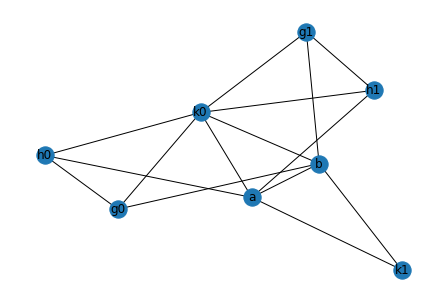

In [11]:
G1 = nx.Graph()
G1.add_nodes_from(["a", "k0", "k1", "g0", "g1"])
G1.add_edges_from([("a", "k0"), ("a", "k1"), ("g0", "k0"), ("g1", "k0")])

#nx.draw(G1)

H1 = nx.Graph()
H1.add_nodes_from(["b", "k0", "k1", "h0", "h1"])
H1.add_edges_from([("b", "k0"), ("b", "k1"), ("h0", "k0"), ("h1", "k0")])

#nx.draw(H1)

M1 = gcj.PotentialEdgeMatrix(2, 2)
M1.matrix[0][0].set_exists(gcj.EdgeExists.TRUE)
M1.matrix[0][1].set_exists(gcj.EdgeExists.FALSE)
M1.matrix[1][1].set_exists(gcj.EdgeExists.TRUE)
M1.matrix[1][0].set_exists(gcj.EdgeExists.FALSE)

g_map1 = {"g0":0, "g1":1}
h_map1 = {"h0":0, "h1":1}

glued = glue(G1, "a", H1, "b", M1, g_map1, h_map1)
nx.draw(glued, with_labels=True)


General procedure: Pick some K shared neighborhood. In our case, this just involves choosing a value for d. Then, iterate through all graphs in R(K3,K6-e,16). For each graph, iterate through each vertex and check if a pointed graph can be constructed. Do this again to pick 2 pointed graphs. At this point, attempt to glue the graphs. From the paper: 
> Note that this consisted of one gluing problem for each
automorphism of K.

In our case, this means considering all d! ways to map an instance of K in the first pointed graph to an instance of K in the second graph.
Repeat for 15, 14, 13, and 12 vertex graphs in R(K3, K6-e). 

Note that for 16 vertices, d >= 5. For 15, d >=4, etc.

0 [11, 12, 13, 14, 15]
1 [8, 9, 10, 14, 15]
2 [6, 7, 10, 13, 15]
3 [4, 5, 10, 13, 14]
4 [3, 7, 9, 12, 15]
5 [3, 6, 8, 11, 15]
6 [2, 5, 9, 12, 14]
7 [2, 4, 8, 11, 14]
8 [1, 5, 7, 12, 13]
9 [1, 4, 6, 11, 13]
10 [1, 2, 3, 11, 12]
11 [0, 5, 7, 9, 10]
12 [0, 4, 6, 8, 10]
13 [0, 2, 3, 8, 9]
14 [0, 1, 3, 6, 7]
15 [0, 1, 2, 4, 5]


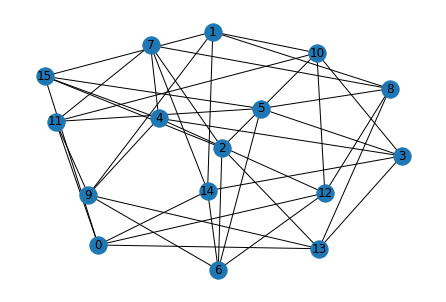

In [14]:
#Note: networkx is annoying with reading g6 graphs - it sometimes returns lists or othertimes just returns a graph
#so we premetively have to switch depending on what's in the file

G = nx.read_graph6('dataset_k3kme/k3k6e_16.g6')
G = nx.complement(G)
nx.draw(G, with_labels=True)
for v in G:
    possible_K = list(nx.neighbors(G,v))
    if len(possible_K) == 5 and is_independent_set(G, possible_K):
        print(v, possible_K) 

## Example usage 

There are 16 pointed graphs here. We try gluing the first graph to itself with the identity mapping for K

In [11]:
G = nx.read_graph6('dataset_k3kme/k3k6e_16.g6')
G = nx.complement(G)
map1 = {0:"a", 11:"k0", 12:"k1", 13:"k2", 14:"k3", 15:"k4"}
for i in range(16):
    if i not in map1:
        map1[i] = "g"+str(i)
nx.relabel_nodes(G, map1, False)
#nx.draw(G, with_labels=True)

H = nx.read_graph6('dataset_k3kme/k3k6e_16.g6')
H = nx.complement(H)
map2 = {0:"b", 11:"k0", 12:"k1", 13:"k2", 14:"k3", 15:"k4"}
for i in range(16):
    if i not in map2:
        map2[i] = "h"+str(i)
nx.relabel_nodes(H, map2, False)
#nx.draw(H, with_labels=True)

K = nx.Graph()
K.add_nodes_from(["k0", "k1", "k2", "k3", "k4"])

clauses, M, g_map, h_map = create_SAT_formula(G, "a", H, "b", K)

stack = setup_stack(clauses)
print(stack)
if stack is None:
     print("4,1,1 issue")
else:
    solution = recursive_solving(M, clauses, stack, 0)
    print(solution)
    # if solution == None:
    #     print("no solution found...?")
    # else:
    #     glued = glue(G, "a", H, "b", solution, g_map, h_map)
    #     print(glued.clique_number())
    #     print(glued.complement().clique_number())


[]
0


This shows how to test if a graph has a J6. It returns true or false depending if it has a J6. It also returns a list of all tuples that form said J6. We have 2 implementations - it seems the second is much faster

In [10]:
glued = nx.read_graph6('test.g6')
def hasJ6_slow(graph):
    has_J6 = False
    J6_list = []
    for v_comb in itertools.combinations(graph.nodes(), 6):
        num_edges = 0
        for pair in itertools.combinations(v_comb, 2):
            if graph.has_edge(pair[0], pair[1]):
                num_edges += 1
        if num_edges <= 1:
            has_J6 = True
            J6_list.append(v_comb)
    return has_J6, J6_list

def hasJ6(graph):
    g_comp = nx.complement(graph)
    all_cliques = nx.find_cliques(g_comp)
    has_J6 = False 
    J6_list = []
    for clique in all_cliques:
        if len(clique) == 5:
            #see if we can find 1 vertex that makes this a J6
            for v in graph.nodes():
                if v not in clique:
                    num_edges = 0
                    for u in clique:
                        if graph.has_edge(v, u):
                            num_edges += 1
                    if num_edges <= 1:
                        has_J6 = True
                        fullJ6 = list(clique)
                        fullJ6.append(v)
                        J6_list.append(fullJ6)
    return has_J6, J6_list

In [26]:
hasJ6_slow(glued)

(False, [])

In [27]:
hasJ6(glued)

(False, [])

## Gluing for degree 15 problems

First we find all the pointed graphs

0 [7, 8, 9, 13, 14]
1 [5, 6, 9, 12, 14]
2 [3, 4, 9, 12, 13]
3 [2, 6, 8, 11, 14]
4 [2, 5, 7, 10, 14]
5 [1, 4, 8, 11, 13]
6 [1, 3, 7, 10, 13]
7 [0, 4, 6, 11, 12]
8 [0, 3, 5, 10, 12]
9 [0, 1, 2, 10, 11]
10 [4, 6, 8, 9]
11 [3, 5, 7, 9]
12 [1, 2, 7, 8]
13 [0, 2, 5, 6]
14 [0, 1, 3, 4]


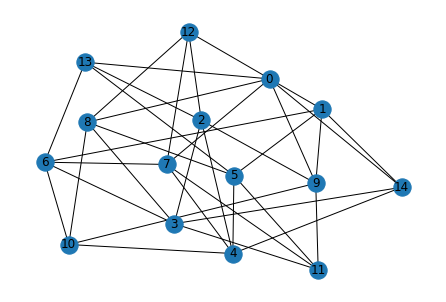

In [17]:
G = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
G = nx.complement(G)
nx.draw(G, with_labels=True)
for v in G:
    possible_K = list(nx.neighbors(G,v))
    if len(possible_K) == 4 and is_independent_set(G, possible_K):
        print(v, possible_K) 
    if len(possible_K) == 5 and is_independent_set(G, possible_K):
        print(v, possible_K) 

# from sage.graphs.graph_input import from_graph6
# with open('dataset_k3kme/k3k6e_15.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
#     graphs = file.readlines() 
#     for i in range(len(graphs)):
#         G = Graph() # Create an empty graph
#         from_graph6(G, graphs[i])
#         G = G.complement()
#         G.show()
#         for vertex in G.vertices():
#             possible_K = G.neighbors(vertex)
#             if len(possible_K) == 4 and G.is_independent_set(possible_K):
#                 print(i, vertex, possible_K)
#             if len(possible_K) == 5 and G.is_independent_set(possible_K):
#                 print(i, vertex, possible_K)

Here we determine how many actual gluing problems we need to solve - to do this, we glue every pair together (without adding extra edges) and comparing to known problems to see how many there are.

In [37]:
#function to do the basic gluing with no extra edges
#G,H are nx graphs, a_old and b_old are integers of the vertices that define pointed graphs.
def no_edge_glue(G, a_old, H, b_old, perm):
    G_k = list(nx.neighbors(G,a_old))
    G_k.sort()
    map1 = {a_old:"a"}
    g_map = {}
    for i in range(len(G_k)):
        map1[G_k[i]] = "k"+str(i)
    index = 0
    for i in range( len(G.nodes()) ):
        if i not in map1:
            new_name = "g"+str(i)
            map1[i] = new_name 
            g_map[new_name] = index
            index += 1 
    nx.relabel_nodes(G, map1, False)


    H_k = list(nx.neighbors(H,b_old))
    H_k.sort()
    map2 = {b_old:"b"}
    h_map = {}
    for i in range(len(H_k)):
        map2[H_k[i]] = perm[i]
    index = 0
    for i in range( len(H.nodes()) ):
        if i not in map2:
            new_name = "h"+str(i)
            map2[i] = new_name
            h_map[new_name] = index
            index += 1
    nx.relabel_nodes(H, map2, False)


    M = gcj.PotentialEdgeMatrix(len(g_map), len(h_map))
    for i in range(len(g_map)):
        for j in range(len(h_map)):
            M.matrix[i][j].set_exists(gcj.EdgeExists.FALSE)
    
    glued_graph = glue(G, "a", H, "b", M, g_map, h_map)
    return glued_graph


#will contain a elements of the form (i,j, permutation, Graph) where i,j are pairs used, 
#permutation is the automorphism, Graph is the glued graph
real_gluing_problems = []

for pair in itertools.combinations_with_replacement(range(10), 2):
    a = pair[0]
    b = pair[1]
    
    for perm in itertools.permutations(["k0", "k1", "k2", "k3", "k4"], 5):
        G = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
        G = nx.complement(G)

        H = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
        H = nx.complement(H)
        glued_graph = no_edge_glue(G, a, H, b, perm)
        is_new = True 
        for tuple in real_gluing_problems:
            if nx.is_isomorphic(glued_graph, tuple[3]):
                is_new = False
                break
        if is_new:
            print(pair, perm)
            real_gluing_problems.append((pair[0], pair[1], perm, glued_graph))

for pair in itertools.combinations_with_replacement(range(10, 15), 2):
    a = pair[0]
    b = pair[1]
    
    for perm in itertools.permutations(["k0", "k1", "k2", "k3"], 4):
        G = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
        G = nx.complement(G)

        H = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
        H = nx.complement(H)
        glued_graph = no_edge_glue(G, a, H, b, perm)
        is_new = True 
        for tuple in real_gluing_problems:
            if nx.is_isomorphic(glued_graph, tuple[3]):
                is_new = False
                break
        if is_new:
            print(pair, perm)
            real_gluing_problems.append((pair[0], pair[1], perm, glued_graph))




(0, 0) ('k0', 'k1', 'k2', 'k3', 'k4')
(0, 0) ('k0', 'k1', 'k3', 'k2', 'k4')
(0, 0) ('k0', 'k3', 'k4', 'k1', 'k2')
(10, 10) ('k0', 'k1', 'k2', 'k3')


In [20]:
#Description: Takes the variables and clauses and recursively calls the stack algo to find all gluings
#This one aims to get all gluings and save them to a file.
#Input: M are the initial variables, clauses are the clauses 
#This probably means we need to make a copy of M/clauses/a new stack for each execution in case of failure.
#Output: list of possible gluings
count = 0
def recursive_solving_get_all(M, clauses, stack, G, a, H, b, g_map, h_map, file_to_write):
    global count
    if stack_algo(stack) == False:
        return 0
    else:
        unknown_list = []
        for list in M.matrix:
            for elem in list:
                if elem.exists == gcj.EdgeExists.UNKNOWN:
                    unknown_list.append(elem)
        if len(unknown_list) == 0:
            glued = glue(G, a, H, b, M, g_map, h_map)
            g6_bytes = nx.to_graph6_bytes(glued)
            file_to_write.write(g6_bytes)
            count += 1
            return 1 
        else:
            #this part of the code creates a copy of M and clauses
            #we use the original M and clauses for the first recursion, and the copy for a second
            #this copying is done to prevent changes in one recursion from affecting the second
            num_rows = len(M.matrix)
            num_cols = len(M.matrix[0])
            M_copy = gcj.PotentialEdgeMatrix(num_rows, num_cols)
            clauses_copy = []

            for clause in clauses:
                #we only copy unsatisfied clauses as an optimization
                if not (clause.is_satisfied()):
                    old_vars = clause.potential_edges
                    new_vars = []
                    for var in old_vars:
                        new_vars.append(M_copy.matrix[var.G_vertex][var.H_vertex])
                    new_clause = gcj.Clause(new_vars, clause.clause_type)
                    clauses_copy.append(new_clause)

            for i in range(num_rows):
                for j in range(num_cols):
                    if M.matrix[i][j].exists == gcj.EdgeExists.TRUE:
                        M_copy.matrix[i][j].set_exists(gcj.EdgeExists.TRUE)
                    elif M.matrix[i][j].exists == gcj.EdgeExists.FALSE:
                        M_copy.matrix[i][j].set_exists(gcj.EdgeExists.FALSE)

            
            #Using the paper's heuristic to decide what variable to add to the stack
            next_vertex = unknown_list[0]
            best_forcing = 0
            for unknown_candidate in unknown_list:
                num_forcing = 0
                for c_clause in unknown_candidate.clique_clauses:
                    num_variables = len(c_clause.potential_edges)
                    if c_clause.num_unknown == 2 and c_clause.num_undesired == num_variables - 2:
                        num_forcing += 1 
                for i_clause in unknown_candidate.ind_same_set_clauses:
                    num_variables = len(i_clause.potential_edges)
                    if i_clause.num_unknown == 2 and i_clause.num_undesired == num_variables - 2:
                        num_forcing += 1 
                for i_clause in unknown_candidate.ind_set_clauses:
                    num_variables = len(i_clause.potential_edges)
                    if i_clause.num_unknown == 3 and i_clause.num_undesired == num_variables - 3:
                        num_forcing += 1 
                if num_forcing > best_forcing:
                    next_vertex = unknown_candidate
                    best_forcing = num_forcing
            
            stack = [next_vertex]
            stack_copy = [M_copy.matrix[next_vertex.G_vertex][next_vertex.H_vertex]]
            
            M.matrix[next_vertex.G_vertex][next_vertex.H_vertex].set_exists(gcj.EdgeExists.FALSE)
            M_copy.matrix[next_vertex.G_vertex][next_vertex.H_vertex].set_exists(gcj.EdgeExists.TRUE)
            val1 = recursive_solving_get_all(M, clauses, stack, G, a, H, b, g_map, h_map, file_to_write)           
            val2 = recursive_solving_get_all(M_copy, clauses_copy, stack_copy, G, a, H, b, g_map, h_map, file_to_write)
            return val1+val2

With this, we try gluing each of the 4 cases we found above. First, we glue (0,0) with permutation (k0, k1, k2, k3, k4)

In [ ]:
G = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
G = nx.complement(G)
#(0, 0) ('k0', 'k1', 'k2', 'k3', 'k4')
#0 [7, 8, 9, 13, 14]
map1 = {0:"a", 7:"k0", 8:"k1", 9:"k2", 13:"k3", 14:"k4"}
for i in range(15):
    if i not in map1:
        map1[i] = "g"+str(i)
nx.relabel_nodes(G, map1, False)
#nx.draw(G, with_labels=True)

H = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
H = nx.complement(H)
map2 = {0:"b", 7:"k0", 8:"k1", 9:"k2", 13:"k3", 14:"k4"}
for i in range(15):
    if i not in map2:
        map2[i] = "h"+str(i)
nx.relabel_nodes(H, map2, False)
#nx.draw(H, with_labels=True)

K = nx.Graph()
K.add_nodes_from(["k0", "k1", "k2", "k3", "k4"])

clauses, M, g_map, h_map = create_SAT_formula(G, "a", H, "b", K)

stack = setup_stack(clauses)
print(stack)
if stack is None:
     print("4,1,1 issue")
else:
    file = open("15iso1.g6", "wb")
    count = 0
    solution = recursive_solving_get_all(M, clauses, stack, G, "a", H, "b", g_map, h_map, file)
    print(solution)
    print(count)
    file.close()

Next we do the second gluing problem: (0, 0) ('k0', 'k1', 'k3', 'k2', 'k4'). This one has no gluings, which is nice.

In [ ]:
G = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
G = nx.complement(G)
#(0, 0) ('k0', 'k1', 'k3', 'k2', 'k4')
#0 [7, 8, 9, 13, 14]
map1 = {0:"a", 7:"k0", 8:"k1", 9:"k2", 13:"k3", 14:"k4"}
for i in range(15):
    if i not in map1:
        map1[i] = "g"+str(i)
nx.relabel_nodes(G, map1, False)
#nx.draw(G, with_labels=True)

H = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
H = nx.complement(H)
map2 = {0:"b", 7:"k0", 8:"k1", 9:"k3", 13:"k2", 14:"k4"}
for i in range(15):
    if i not in map2:
        map2[i] = "h"+str(i)
nx.relabel_nodes(H, map2, False)
#nx.draw(H, with_labels=True)

K = nx.Graph()
K.add_nodes_from(["k0", "k1", "k2", "k3", "k4"])

clauses, M, g_map, h_map = create_SAT_formula(G, "a", H, "b", K)

stack = setup_stack(clauses)
print(stack)
if stack is None:
     print("4,1,1 issue")
else:
    file = open("15iso2.g6", "wb")
    count = 0
    solution = recursive_solving_get_all(M, clauses, stack, G, "a", H, "b", g_map, h_map, file)
    print(solution)
    print(count)
    file.close()

The third gluing problem is (0, 0) ('k0', 'k3', 'k4', 'k1', 'k2').

In [ ]:
G = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
G = nx.complement(G)
#(0, 0) ('k0', 'k3', 'k4', 'k1', 'k2')
#0 [7, 8, 9, 13, 14]
map1 = {0:"a", 7:"k0", 8:"k1", 9:"k2", 13:"k3", 14:"k4"}
for i in range(15):
    if i not in map1:
        map1[i] = "g"+str(i)
nx.relabel_nodes(G, map1, False)
#nx.draw(G, with_labels=True)

H = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
H = nx.complement(H)
map2 = {0:"b", 7:"k0", 8:"k3", 9:"k4", 13:"k1", 14:"k2"}
for i in range(15):
    if i not in map2:
        map2[i] = "h"+str(i)
nx.relabel_nodes(H, map2, False)
#nx.draw(H, with_labels=True)

K = nx.Graph()
K.add_nodes_from(["k0", "k1", "k2", "k3", "k4"])

clauses, M, g_map, h_map = create_SAT_formula(G, "a", H, "b", K)

stack = setup_stack(clauses)
print(stack)
if stack is None:
     print("4,1,1 issue")
else:
    file = open("15iso3.g6", "wb")
    count = 0
    solution = recursive_solving_get_all(M, clauses, stack, G, "a", H, "b", g_map, h_map, file)
    print(solution)
    print(count)
    file.close()

The last gluing problem (which also takes the most time) is (10, 10) ('k0', 'k1', 'k2', 'k3'). There should be 5280 of these graphs.

In [21]:
G = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
G = nx.complement(G)
#(10,10) ('k0', 'k1', 'k2', 'k3')
#10 [4, 6, 8, 9]
map1 = {10:"a", 4:"k0", 6:"k1", 8:"k2", 9:"k3"}
for i in range(15):
    if i not in map1:
        map1[i] = "g"+str(i)
nx.relabel_nodes(G, map1, False)
#nx.draw(G, with_labels=True)

H = nx.read_graph6('dataset_k3kme/k3k6e_15.g6')
H = nx.complement(H)
map2 = {10:"b", 4:"k0", 6:"k1", 8:"k2", 9:"k3"}
for i in range(15):
    if i not in map2:
        map2[i] = "h"+str(i)
nx.relabel_nodes(H, map2, False)
#nx.draw(H, with_labels=True)

K = nx.Graph()
K.add_nodes_from(["k0", "k1", "k2", "k3"])

clauses, M, g_map, h_map = create_SAT_formula(G, "a", H, "b", K)

stack = setup_stack(clauses)
print(stack)
if stack is None:
     print("4,1,1 issue")
else:
    file = open("15iso4.g6", "wb")
    count = 0
    solution = recursive_solving_get_all(M, clauses, stack, G, "a", H, "b", g_map, h_map, file)
    print(solution)
    print(count)
    file.close()

[]
5820
5820


We now verify all these gluings are in fact K4 J6 free.

In [28]:
glued_graphs = nx.read_graph6('15iso1.g6')
print(len(glued_graphs))
for i in range(len(glued_graphs)):
    graph = glued_graphs[i]
    clique_number = nx.algorithms.graph_clique_number(graph)
    if clique_number > 3:
        print(i, "has a K4")
    has_j6_bool, j6_list = hasJ6(graph)
    if has_j6_bool:
        print(i, "has a J6")
        print(j6_list)

glued_graphs = nx.read_graph6('15iso3.g6')
print(len(glued_graphs))
for i in range(len(glued_graphs)):
    graph = glued_graphs[i]
    clique_number = nx.algorithms.graph_clique_number(graph)
    if clique_number > 3:
        print(i, "has a K4")
    has_j6_bool, j6_list = hasJ6(graph)
    if has_j6_bool:
        print(i, "has a J6")
        print(j6_list)

glued_graphs = nx.read_graph6('15iso4.g6')
print(len(glued_graphs))
for i in range(len(glued_graphs)):
    graph = glued_graphs[i]
    clique_number = nx.algorithms.graph_clique_number(graph)
    if clique_number > 3:
        print(i, "has a K4")
    has_j6_bool, j6_list = hasJ6(graph)
    if has_j6_bool:
        print(i, "has a J6")
        print(j6_list)

6908
7842
5820


## Gluings for degree 14

We first find all the pointed graphs

In [39]:
list_wrong_order = nx.read_graph6('dataset_k3kme/k3k6e_14.g6')
list_graphs = []
for G in list_wrong_order:
    list_graphs.append(nx.complement(G))
#pointed graphs will be stored as tuples (index, v, nbd) where index is which graph was picked
list_3_shared_nbd = []
list_4_shared_nbd = []
list_5_shared_nbd = []
index = 0
for G in list_graphs:
    for v in G:
        possible_K = list(nx.neighbors(G,v))
        if len(possible_K) == 3 and is_independent_set(G, possible_K):
            #print(v, possible_K)
            list_3_shared_nbd.append((index, v, possible_K))
        if len(possible_K) == 4 and is_independent_set(G, possible_K):
            #print(v, possible_K) 
            list_4_shared_nbd.append((index, v, possible_K))
        if len(possible_K) == 5 and is_independent_set(G, possible_K):
            #print(v, possible_K) 
            list_5_shared_nbd.append((index, v, possible_K))
    index += 1


We now look at which gluing problems are unique.

In [42]:
#will contain a elements of the form (i,j, permutation, Graph) where i,j are pairs used, 
#permutation is the automorphism, Graph is the glued graph
real_gluing_problems = []

for pair in itertools.combinations_with_replacement(list_5_shared_nbd, 2):
    tuple1 = pair[0]
    tuple2 = pair[1]
    
    for perm in itertools.permutations(["k0", "k1", "k2", "k3", "k4"], 5):
        G = nx.read_graph6('dataset_k3kme/k3k6e_14.g6')
        G = nx.complement(G[tuple1[0]])

        H = nx.read_graph6('dataset_k3kme/k3k6e_14.g6')
        H = nx.complement(H[tuple2[0]])
        glued_graph = no_edge_glue(G, tuple1[1], H, tuple2[1], perm)
        is_new = True 
        for old_problems in real_gluing_problems:
            if nx.is_isomorphic(glued_graph, old_problems[3]):
                is_new = False
                break
        if is_new:
            #print(pair, perm)
            real_gluing_problems.append((pair[0], pair[1], perm, glued_graph))

for pair in itertools.combinations_with_replacement(list_4_shared_nbd, 2):
    tuple1 = pair[0]
    tuple2 = pair[1]
    
    for perm in itertools.permutations(["k0", "k1", "k2", "k3"], 4):
        G = nx.read_graph6('dataset_k3kme/k3k6e_14.g6')
        G = nx.complement(G[tuple1[0]])

        H = nx.read_graph6('dataset_k3kme/k3k6e_14.g6')
        H = nx.complement(H[tuple2[0]])
        glued_graph = no_edge_glue(G, tuple1[1], H, tuple2[1], perm)
        is_new = True 
        for old_problems in real_gluing_problems:
            if nx.is_isomorphic(glued_graph, old_problems[3]):
                is_new = False
                break
        if is_new:
            #print(pair, perm)
            real_gluing_problems.append((pair[0], pair[1], perm, glued_graph))

for pair in itertools.combinations_with_replacement(list_3_shared_nbd, 2):
    tuple1 = pair[0]
    tuple2 = pair[1]
    
    for perm in itertools.permutations(["k0", "k1", "k2"], 3):
        G = nx.read_graph6('dataset_k3kme/k3k6e_14.g6')
        G = nx.complement(G[tuple1[0]])

        H = nx.read_graph6('dataset_k3kme/k3k6e_14.g6')
        H = nx.complement(H[tuple2[0]])
        glued_graph = no_edge_glue(G, tuple1[1], H, tuple2[1], perm)
        is_new = True 
        for old_problems in real_gluing_problems:
            if nx.is_isomorphic(glued_graph, old_problems[3]):
                is_new = False
                break
        if is_new:
            #print(pair, perm)
            real_gluing_problems.append((pair[0], pair[1], perm, glued_graph))


In [56]:
import pickle

print(len(real_gluing_problems))
gluing_problems_no_glued = []
for problem in real_gluing_problems:
    gluing_problems_no_glued.append((problem[0], problem[1], problem[2]))

file_to_write = open("14gluingproblems", "wb")
pickle.dump(gluing_problems_no_glued, file_to_write)
file_to_write.close()
# for problem in real_gluing_problems:
#     line_to_write = str(problem[0][0])+","+str(problem[0][1])+","+str(problem[1][0])+","+str(problem[1][1])+","+str(problem[2])+"\n"
#     file_to_write.write(line_to_write)
#     #print(problem)
# file_to_write.close()

133


In [13]:
import pickle 

file_to_read = open("14gluingproblems", "rb")
test = pickle.load(file_to_read)
print(test[101])



((0, 12, [5, 6, 7, 11]), (0, 12, [5, 6, 7, 11]), ('k0', 'k1', 'k2', 'k3'))


In [14]:
graphs = nx.read_graph6('dataset_k3kme/k3k6e_14.g6')
G = graphs[0].copy()
G = nx.complement(G)
#print(G)
map1 = {12:"a", 5:"k0", 6:"k1", 7:"k2", 11:"k3"}
for i in range(14):
    if i not in map1:
        map1[i] = "g"+str(i)
nx.relabel_nodes(G, map1, False)
#nx.draw(G, with_labels=True)

H = graphs[0].copy()
H = nx.complement(H)
#print(H)
map2 = {12:"b", 5:"k0", 6:"k1", 7:"k2", 11:"k3"}
for i in range(14):
    if i not in map2:
        map2[i] = "h"+str(i)
nx.relabel_nodes(H, map2, False)
#nx.draw(H, with_labels=True)

K = nx.Graph()
K.add_nodes_from(["k0", "k1", "k2", "k3"])

clauses, M, g_map, h_map = create_SAT_formula(G, "a", H, "b", K)
stack = setup_stack(clauses)
print(stack)
if stack is None:
    print("4,1,1 issue")
else:
    #print("bruh")
    solution = recursive_solving(M, clauses, stack, 0)
    print(solution)
    # if solution == None:
    #     print("no solution found...?")
    # else:
    #     glued = glue(G, "a", H, "b", solution, g_map, h_map)
    #     print(glued.clique_number())
    #     print(glued.complement().clique_number())


Problem (8,7,U), ClauseType.INDEP_NO_EDGES
None
4,1,1 issue


### Applying Vertex Extension

We first do isomorphism checking between solutions of gluing problems

In [ ]:
import networkx as nx
glued_graphs = []
graph15_1 = nx.read_graph6('15iso1.g6')
graph15_3 = nx.read_graph6('15iso3.g6')
graph15_4 = nx.read_graph6('15iso4.g6')
print(len(graph15_1) + len(graph15_3) + len(graph15_4))
for gluing_result in graph15_1:
    is_new = True
    for unique in glued_graphs:
        if nx.is_isomorphic(gluing_result, unique):
            is_new = False
            break
    if is_new :
        glued_graphs.append(gluing_result)

for gluing_result in graph15_3:
    is_new = True
    for unique in glued_graphs:
        if nx.is_isomorphic(gluing_result, unique):
            is_new = False
            break
    if is_new :
        glued_graphs.append(gluing_result)

for gluing_result in graph15_4:
    is_new = True
    for unique in glued_graphs:
        if nx.is_isomorphic(gluing_result, unique):
            is_new = False
            break
    if is_new :
        glued_graphs.append(gluing_result)
print(len(glued_graphs))

Pynauty Comparison Code - see improvement in efficiency from 19m 6.2 s -> 7.9 seconds

In [1]:
import pynauty as pn
import networkx as nx 

def convertNetworkXGraph(nx_graph):
    pn_graph = pn.Graph(len(nx_graph))
    for n in nx_graph:
        list_neighbors = []
        for nbs in nx_graph[n]:
            list_neighbors.append(nbs)
        pn_graph.connect_vertex(n, list_neighbors)
    return pn_graph

list_of_graphs = nx.read_graph6("15iso1.g6")
hash_set = set()
unique_solns = []

for nx_graph in list_of_graphs:
    pn_graph = convertNetworkXGraph(nx_graph)
    cert = pn.certificate(pn_graph)
    if cert not in hash_set:
        hash_set.add(cert)
        unique_solns.append(nx_graph)

print(len(hash_set))
list_of_graphs = nx.read_graph6("15iso3.g6")

for nx_graph in list_of_graphs:
    pn_graph = convertNetworkXGraph(nx_graph)
    cert = pn.certificate(pn_graph)
    if cert not in hash_set:
        hash_set.add(cert)
        unique_solns.append(nx_graph)

print(len(hash_set))
list_of_graphs = nx.read_graph6("15iso4.g6")

for nx_graph in list_of_graphs:
    pn_graph = convertNetworkXGraph(nx_graph)
    cert = pn.certificate(pn_graph)
    if cert not in hash_set:
        hash_set.add(cert)
        unique_solns.append(nx_graph)

print(len(hash_set))
print(len(unique_solns))

335
1355
1477
1477


In [39]:
file_to_write = open("15allproblemsiso", "wb")
pickle.dump(glued_graphs, file_to_write)
file_to_write.close()

In [6]:
import pickle
file_to_read = open("15allproblemsiso", "rb")
glued_graphs = pickle.load(file_to_read)
print(len(glued_graphs))
file_to_read.close()
file_to_write = open("15allproblemsiso.g6", "wb")
for res in glued_graphs:
    file_to_write.write(nx.to_graph6_bytes(res))
file_to_write.close()

1477


In [1]:
import networkx as nx 
graphs = nx.read_graph6("testout.g6")
len(graphs)

1477

Testing the time it takes to iterate through a very large gluing file - largest is 130. Worst case scenario, iterating looks like it takes around 3 minutes.

In [9]:
num_lines = sum(1 for line in open('14-graphs/14iso130.g6'))
print(num_lines)

809192112


### Degree 12 scenario - using the complement and Elisha's graphs

Note we now are working in R(J5, K4, 12). When gluing here, the shared neighborhood will be R(J4, K4, d). The question is which values of d can be used. In order to determine this, we look at the possible degrees of each vertex of these graphs. It seems we only need to care about 8 <= d <= 10. We then need to find all R(J4, K4, d) graphs of these kinds.

In [54]:
import networkx as nx 
def hasJn(graph, n):
    all_cliques = nx.find_cliques(graph)
    has_Jn = False 
    Jn_list = []
    for clique in all_cliques:
        if len(clique) == n-1:
            #see if we can find 1 vertex that makes this a Jn
            for v in graph.nodes():
                if v not in clique:
                    num_edges = 0
                    for u in clique:
                        if graph.has_edge(v, u):
                            num_edges += 1
                    if num_edges >= n-2:
                        has_Jn = True
                        fullJn = list(clique)
                        fullJn.append(v)
                        Jn_list.append(fullJn)
        elif len(clique) >= n:
            has_Jn = True
            fullJn = list(clique)
            Jn_list.append(fullJn)
    return has_Jn, Jn_list




need_to_comp_graphs = nx.read_graph6("rk4j5-18.g6")
graphs = []
for need_to_comp_graph in need_to_comp_graphs:
    #Currently, graphs are in K4, J5 format. 
    #Thus this clique number tells us no K4 
    #print(nx.graph_clique_number(need_to_comp_graph) )
    graphs.append(nx.complement(need_to_comp_graph))
for i in range(len(graphs)):
    G = graphs[i]
    #This tells us no J5
    print("Graph " + str(i) )
    print(nx.graph_clique_number(G) )
    print(hasJn(G, 5))
    possible_degs = set()
    for vtx in G:
        deg = len(list(nx.neighbors(G, vtx)))
        possible_degs.add(deg)
    print(possible_degs)

for i in range(len(need_to_comp_graphs)):
    G = need_to_comp_graphs[i]
    #This tells us no J5
    # print("Graph " + str(i) )
    # print(nx.graph_clique_number(G) )
    # print(hasJn(G, 5))
    possible_degs = set()
    for vtx in G:
        deg = len(list(nx.neighbors(G, vtx)))
        possible_degs.add(deg)
    print(possible_degs)

Graph 0
4
(False, [])
{8, 9, 10}
Graph 1
4
(False, [])
{8, 9, 10}
Graph 2
4
(False, [])
{9}
Graph 3
4
(False, [])
{8, 9}
Graph 4
4
(False, [])
{8, 9}
Graph 5
4
(False, [])
{9}


We then find all pointed graphs here. To start, we check the format of the dataset graphs. They are in J4, K4 already

In [56]:
import numpy as np 
deg10graphs = nx.read_graph6("dataset_k4kme/k4k4e_10.g6")
deg8graphs = nx.read_graph6("dataset_k4kme/k4k4e_08.g6")
deg9graphs = nx.read_graph6("dataset_k4kme/k4k4e_09.g6")
###Note that there are J4's (in the edges), but not in the complement
# for g in deg8graphs:
#     if hasJn(g, 4)[0] == True:
#         print("Edges have a J4")
#     if hasJn(nx.complement(g), 4)[0] == True:
#         print("Complement has a J4")

# for g in deg9graphs:
#     if hasJn(g, 4)[0] == True:
#         print("Edges have a J4")
#     if hasJn(nx.complement(g), 4)[0] == True:
#         print("Complement has a J4")

for g in deg10graphs:
    if hasJn(g, 4)[0] == True:
        print("Edges have a J4")
    if hasJn(nx.complement(g), 4)[0] == True:
        print("Complement has a J4")

Complement has a J4
Complement has a J4
Complement has a J4
Complement has a J4
Complement has a J4


With our graphs in the right formats, we now attempt to find pointed graphs. It turns out, we only have to pay attention to 10 graphs, each of which are defined by only 2 unique neighborhoods.

In [57]:
shared_nbrhood_10 = set()
shared_nbrhood_8 = set()
shared_nbrhood_9 = set()
pointed_graphs_10 = []
pointed_graphs_8 = []
pointed_graphs_9 = []
for i in range(len(graphs)):
    G = graphs[i]
    for vtx in G:
        neighbors = list(nx.neighbors(G, vtx))
        possible_K = nx.induced_subgraph(G, neighbors)
        if len(neighbors) == 10:
            for shared_nbrhood in deg10graphs:
                if nx.is_isomorphic(possible_K, shared_nbrhood):
                    pointed_graphs_10.append((i, vtx, neighbors))
                    shared_nbrhood_10.add(shared_nbrhood)
        if len(neighbors) == 8:
            for shared_nbrhood in deg8graphs:
                if nx.is_isomorphic(possible_K, shared_nbrhood):
                    pointed_graphs_8.append((i, vtx, neighbors))
                    shared_nbrhood_8.add(shared_nbrhood)
        if len(neighbors) == 9:
            for shared_nbrhood in deg9graphs:
                if nx.is_isomorphic(possible_K, shared_nbrhood):
                    pointed_graphs_9.append((i, vtx, neighbors))
                    shared_nbrhood_9.add(shared_nbrhood)

print("Number 10 pointed graphs:", len(pointed_graphs_10))
print(pointed_graphs_10)
print("Number 9 pointed graphs:", len(pointed_graphs_9))
print(pointed_graphs_9)
print("Number 8 pointed graphs:", len(pointed_graphs_8))
print(pointed_graphs_8)

print("Num of possible 10 nbhoods we even use:", len(shared_nbrhood_10))
print("Num of possible 9 nbhoods we even use:", len(shared_nbrhood_9))
print("Num of possible 8 nbhoods we even use:", len(shared_nbrhood_8))


Number 10 pointed graphs: 4
[(0, 0, [8, 9, 10, 11, 12, 13, 14, 15, 16, 17]), (0, 16, [0, 1, 2, 3, 4, 8, 11, 14, 15, 17]), (0, 17, [0, 1, 2, 3, 4, 9, 10, 12, 13, 16]), (1, 0, [8, 9, 10, 11, 12, 13, 14, 15, 16, 17])]
Number 9 pointed graphs: 68
[(0, 3, [4, 5, 6, 11, 12, 13, 15, 16, 17]), (0, 4, [3, 5, 6, 8, 9, 10, 14, 16, 17]), (0, 10, [0, 2, 4, 6, 7, 8, 13, 15, 17]), (0, 13, [0, 1, 3, 6, 7, 10, 11, 14, 17]), (0, 14, [0, 1, 4, 5, 7, 9, 13, 15, 16]), (0, 15, [0, 2, 3, 5, 7, 10, 12, 14, 16]), (1, 3, [4, 5, 6, 8, 9, 11, 13, 14, 15]), (1, 4, [3, 5, 6, 8, 10, 12, 13, 16, 17]), (1, 8, [0, 1, 2, 3, 4, 9, 10, 11, 12]), (1, 11, [0, 2, 3, 5, 7, 8, 12, 14, 16]), (1, 12, [0, 1, 4, 5, 7, 8, 11, 15, 17]), (1, 13, [0, 1, 2, 3, 4, 14, 15, 16, 17]), (1, 15, [0, 1, 3, 6, 7, 9, 12, 13, 16]), (1, 16, [0, 2, 4, 6, 7, 10, 11, 13, 15]), (2, 0, [9, 10, 11, 12, 13, 14, 15, 16, 17]), (2, 1, [2, 3, 6, 9, 10, 13, 14, 15, 16]), (2, 2, [1, 4, 6, 7, 9, 10, 11, 15, 17]), (2, 3, [1, 5, 6, 8, 9, 10, 12, 16, 17]), (2, 4, 

We now find the automorphisms of these graphs. To do this, we need to input the graphs into a nauty program and get the automorphisms

In [61]:
i = 0
for K in shared_nbrhood_8:
    edges = set()
    for vtx in K:
        # print(i, vtx, list(nx.neighbors(K, vtx)))
        for other_vtx in nx.neighbors(K, vtx):
            edge = (min(vtx, other_vtx), max(vtx, other_vtx)) 
            edges.add(edge)
    i += 1
    print(K) 
    print(sorted(edges))
    
for K in shared_nbrhood_9:
    edges = set()
    for vtx in K:
        # print(i, vtx, list(nx.neighbors(K, vtx)))
        for other_vtx in nx.neighbors(K, vtx):
            edge = (min(vtx, other_vtx), max(vtx, other_vtx)) 
            edges.add(edge)
    i += 1 
    print(K)
    print(sorted(edges))

for K in shared_nbrhood_10:
    edges = set()
    for vtx in K:
        # print(i, vtx, list(nx.neighbors(K, vtx)))
        for other_vtx in nx.neighbors(K, vtx):
            edge = (min(vtx, other_vtx), max(vtx, other_vtx)) 
            edges.add(edge)
    i += 1 
    print(K)
    print(sorted(edges))

Graph with 8 nodes and 12 edges
[(0, 4), (0, 6), (1, 5), (1, 7), (2, 3), (2, 6), (2, 7), (3, 4), (3, 5), (4, 7), (5, 6), (6, 7)]
Graph with 8 nodes and 13 edges
[(0, 1), (0, 2), (0, 5), (1, 3), (1, 6), (2, 4), (2, 7), (3, 4), (3, 7), (4, 6), (5, 6), (5, 7), (6, 7)]
Graph with 8 nodes and 12 edges
[(0, 1), (0, 2), (0, 3), (1, 4), (1, 6), (2, 5), (2, 7), (3, 6), (3, 7), (4, 5), (4, 7), (5, 6)]
Graph with 8 nodes and 14 edges
[(0, 1), (0, 4), (0, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 6), (3, 5), (3, 7), (4, 5), (4, 6), (5, 7), (6, 7)]
Graph with 8 nodes and 13 edges
[(0, 4), (0, 7), (1, 5), (1, 6), (2, 3), (2, 4), (2, 6), (3, 5), (3, 7), (4, 5), (4, 6), (5, 7), (6, 7)]
Graph with 8 nodes and 14 edges
[(0, 1), (0, 4), (0, 5), (1, 6), (1, 7), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 7), (4, 6), (5, 7), (6, 7)]
Graph with 9 nodes and 18 edges
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 5), (1, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 7), (4, 6), (4, 8), (5, 6), (5, 7), (6, 8), (7, 8)]
G